#### Fonte:
https://www.analyticsvidhya.com/blog/2021/05/bitcoin-price-prediction-using-recurrent-neural-networks-and-lstm/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('BTC-USD.csv', date_parser = True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-27,8837.380859,9203.320313,8834.157227,9181.017578,9181.017578,3.274054e+10
1,2020-05-28,9184.945313,9546.319336,9148.457031,9525.750977,9525.750977,3.436707e+10
2,2020-05-29,9528.355469,9573.666992,9379.338867,9439.124023,9439.124023,3.289664e+10
3,2020-05-30,9438.914063,9704.030273,9366.729492,9700.414063,9700.414063,3.272298e+10
4,2020-05-31,9700.105469,9700.343750,9432.296875,9461.058594,9461.058594,2.777329e+10
...,...,...,...,...,...,...,...
361,2021-05-23,37531.449219,38289.218750,31227.339844,34770.582031,34770.582031,7.846927e+10
362,2021-05-24,34700.363281,39835.140625,34551.082031,38705.980469,38705.980469,6.735958e+10
363,2021-05-25,38795.781250,39776.351563,36581.429688,38402.222656,38402.222656,5.621192e+10
364,2021-05-26,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data_training = data[data['Date'] < '2021-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-27,8837.380859,9203.320313,8834.157227,9181.017578,9181.017578,3.274054e+10
1,2020-05-28,9184.945313,9546.319336,9148.457031,9525.750977,9525.750977,3.436707e+10
2,2020-05-29,9528.355469,9573.666992,9379.338867,9439.124023,9439.124023,3.289664e+10
3,2020-05-30,9438.914063,9704.030273,9366.729492,9700.414063,9700.414063,3.272298e+10
4,2020-05-31,9700.105469,9700.343750,9432.296875,9461.058594,9461.058594,2.777329e+10
...,...,...,...,...,...,...,...
214,2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,6.647990e+10
215,2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,4.905674e+10
216,2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,4.526595e+10
217,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,5.128744e+10


In [4]:
data_test = data[data['Date'] >= '2021-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
219,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,4.073030e+10
220,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,6.786542e+10
221,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,7.866524e+10
222,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,8.116348e+10
223,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,6.754732e+10
...,...,...,...,...,...,...,...
361,2021-05-23,37531.449219,38289.218750,31227.339844,34770.582031,34770.582031,7.846927e+10
362,2021-05-24,34700.363281,39835.140625,34551.082031,38705.980469,38705.980469,6.735958e+10
363,2021-05-25,38795.781250,39776.351563,36581.429688,38402.222656,38402.222656,5.621192e+10
364,2021-05-26,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,8837.380859,9203.320313,8834.157227,9181.017578,3.274054e+10
1,9184.945313,9546.319336,9148.457031,9525.750977,3.436707e+10
2,9528.355469,9573.666992,9379.338867,9439.124023,3.289664e+10
3,9438.914063,9704.030273,9366.729492,9700.414063,3.272298e+10
4,9700.105469,9700.343750,9432.296875,9461.058594,2.777329e+10


In [6]:
# MinMaxScaler is used to normalize the data
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.        , 0.00204837, 0.        , 0.00679619, 0.3465131 ],
       [0.01737458, 0.0191277 , 0.01622793, 0.02407058, 0.37402276],
       [0.03454149, 0.02048945, 0.02814882, 0.01972975, 0.34915331],
       ...,
       [0.91203026, 0.90667804, 0.88565096, 0.91785648, 0.55835576],
       [0.92594131, 0.9847064 , 0.9565309 , 0.99194403, 0.66019751],
       [1.        , 1.        , 1.        , 1.        , 0.58353957]])

In [20]:
X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(159, 60, 5)

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

#Initialize the RNN
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 60, 50)            11200     
_________________________________________________________________
dropout_28 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 60, 60)            26640     
_________________________________________________________________
dropout_29 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_30 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_30 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 120)              

In [30]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history= model.fit(X_train, Y_train, epochs = 20, batch_size =50, validation_split=0.1)

Epoch 1/20
3/3 [==============================] - 8s 846ms/step - loss: nan - val_loss: nan
Epoch 2/20
3/3 [==============================] - 1s 372ms/step - loss: nan - val_loss: nan
Epoch 3/20
3/3 [==============================] - 1s 331ms/step - loss: nan - val_loss: nan
Epoch 4/20
3/3 [==============================] - 1s 361ms/step - loss: nan - val_loss: nan
Epoch 5/20
3/3 [==============================] - 1s 353ms/step - loss: nan - val_loss: nan
Epoch 6/20
3/3 [==============================] - 1s 369ms/step - loss: nan - val_loss: nan
Epoch 7/20
3/3 [==============================] - 1s 328ms/step - loss: nan - val_loss: nan
Epoch 8/20
3/3 [==============================] - 1s 340ms/step - loss: nan - val_loss: nan
Epoch 9/20
3/3 [==============================] - 1s 333ms/step - loss: nan - val_loss: nan
Epoch 10/20
3/3 [==============================] - 1s 331ms/step - loss: nan - val_loss: nan
Epoch 11/20
3/3 [==============================] - 1s 341ms/step - loss: nan - 

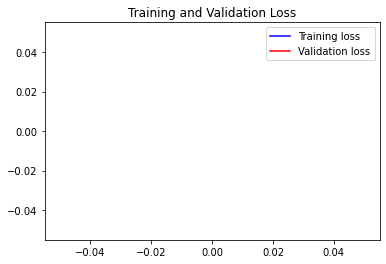

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [33]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,13737.032227,13808.323242,13243.160156,13550.489258,3.077146e+10
1,13550.451172,13984.981445,13325.441406,13950.300781,2.986995e+10
2,13950.488281,14218.766602,13580.471680,14133.707031,3.511636e+10
3,14133.733398,15706.404297,14102.088867,15579.848633,4.085632e+10
4,15579.729492,15903.437500,15226.839844,15565.880859,3.983784e+10


In [35]:
inputs = scaler.transform(df)
inputs

array([[0.24493121, 0.23135043, 0.22764563, 0.22574785, 0.31320997],
       [0.23560412, 0.24014696, 0.23189397, 0.24578217, 0.2979628 ],
       [0.25560178, 0.25178809, 0.24506169, 0.25497255, 0.38669556],
       ...,
       [1.49760602, 1.52440549, 1.43264709, 1.47105364, 0.74348528],
       [       nan,        nan,        nan,        nan,        nan],
       [1.51770181, 1.49559609, 1.5151518 , 1.46889346, 0.6587977 ]])

In [36]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i]) 
    Y_test.append(inputs[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test)


In [37]:
X_test.shape

(147, 60, 5)

In [38]:
Y_test.shape

(147,)

In [39]:
Y_pred = regressor.predict(X_test)

NameError: name 'regressor' is not defined